# Banknote authentication using machine learning
### Report by: M Hasibur Rahman and Noman Noor
Our aim of this project is to use the given "UCI machine learning" repository:
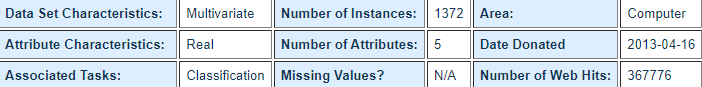 

(Link: https://archive.ics.uci.edu/ml/datasets/banknote+authentication)
to classify the given data and train the data to check if a banknote is real or fake (testing it on about 20% of the dataset). We are going to use Random Forest Algorithm, Support Vector Machine and Linear Regression algorithms to train and test the algorithm on our test set. We will also analyze our data and analyse all the findings from data statistics.

# Importing required libraries:
We used panda library to read and import the dataset. Seaborn library was used to visualize the data and matplotlib to visualize each individual features.

In [ ]:
import pandas as pd 

import matplotlib.pyplot as plt

import seaborn as sns


# Importing Dataset:
We used panda to import the dataset and since our dataset (.txt) did not have any headers inside the text file we gave the headers individually using 'names' and assigning the appropriate headers by spliting each feature data with parameter, *delimiter=','*.

In [ ]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
banknote_data = pd.read_csv(path, delimiter=',', names=["variance", "skewness", "kurtosis", "entropy","class"])

# Data exploratory analysis:


The head() function allows us to see a snippet of the data. Each column is referred to as feature. There is 4 continious data features and one is a class variable. They can be described as below:


* Variance – is the fact or quality of being different, divergent, or inconsistent.
* Skewness - tells us about the direction of outliers (amount by which something differs to 'normal')
* Kurtosis - identifies whether the tails of a given distribution contain extreme values.
* Entropy - simple measure of disorder
* Class - to be trained/predicted (identifier of whether the banknote is real or not)
  * Class 0 means that banknote is fake
  * Class 1 means banknote is real.



In [ ]:
banknote_data.head()

,variance,skewness,kurtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


The describe() function shows the statistical outlook of the data with additional useful statistical information like mean, count etc. An important observation we saw from the describe() function is that mean class value is near **0.5**. This suggests that our data is quite balanced.

In [ ]:
banknote_data.describe()

,variance,skewness,kurtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


The parplot() function from the seabord library allows us to show how the classes are different in each feature. We can also see the correlations between each feature from a graphical point of view. For a more detailed analysis of the correlation, the next cell we will use correlation functions built in function of seaborn to find correlation data and thus draw analysis from those data.

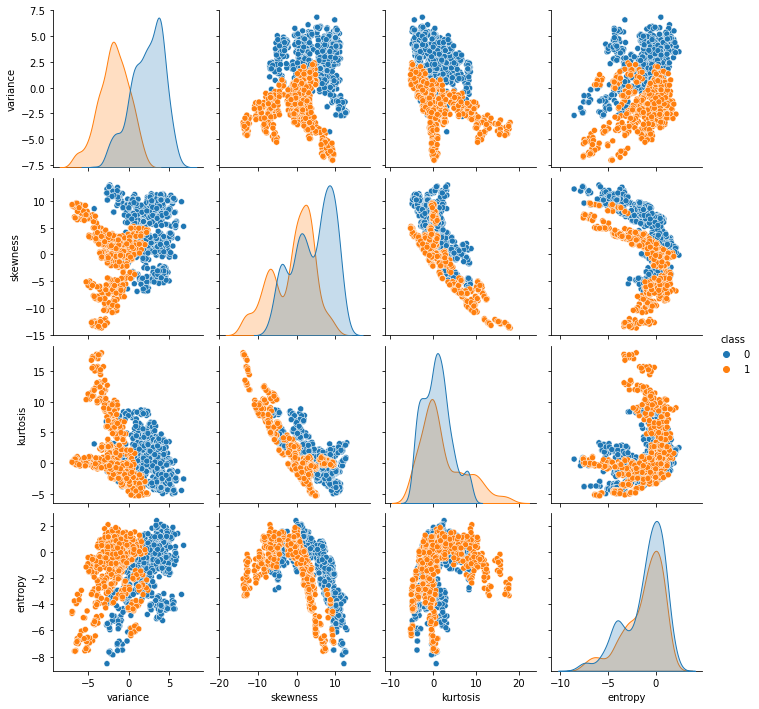

In [ ]:
sns.pairplot(banknote_data, hue='class') 

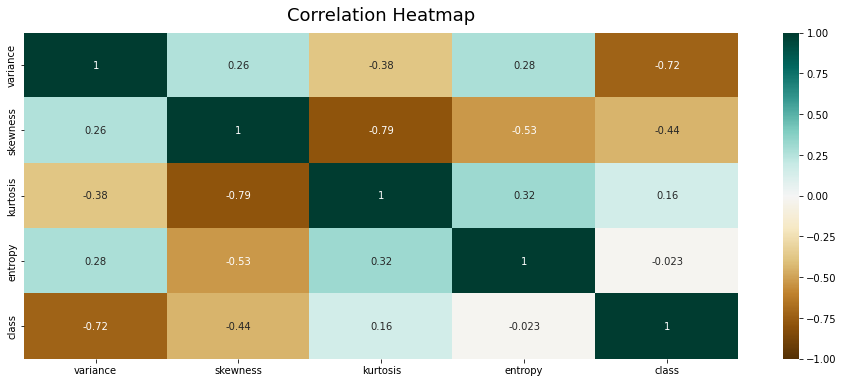

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(banknote_data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

From this correlation heatmap, we can observe the following:

*   The main reason to see the correlation values is to see if we can use the modern classifier algorithms like Logistic Regression. Since, such algorithms can not be used if we have Multicolleineraity issue (Multicollinearity happens when one predictor variable in a multiple regression model can be linearly predicted from the others with a high degree of accuracy). From the above we can see that, none of our correlation has perfectly positive or negative attributes (i.e. a value of +1 or -1). So, we won't have any issues of Multicollinearity and can use any of the classifier algorithm without doubts. 
*   There is a very high negative correlation between skewness and kurtosis 
* There is a moderetly positive correlation between kurtosis and entropy



# Setting up and Extracting features (and their labels):

We split the data into feature and label set. The iloc function allows us to split data according to the columns. Hence, iloc\[:,0:4] only takes our four columns containing continuous feature. iloc\[:,4] takes only the class column and represent our label (to be trained/predicted). Our test size will be 20% of the dataset.

In [ ]:
data_features = banknote_data.iloc[:, 0:4].values

In [ ]:
data_labels = banknote_data.iloc[:, 4].values 

In [ ]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(data_features, data_labels, test_size=0.2, random_state=21)

# Using Random Forest Classifier algorithm:

**Setting up RFC:**

fit() method is used to train the data set. A value of 200 is used for the n_estimator. As we know, higher number of trees give better performance however can makes our code slower.

In [ ]:
from sklearn.ensemble import RandomForestClassifier as rfc

rfc_object = rfc(n_estimators=200, random_state=0) 

rfc_object.fit(train_features, train_labels) 

RandomForestClassifier(n_estimators=200, random_state=0)

**Applying RFC to predict the classes (here, labels):**

In [ ]:
predicted_labels = rfc_object.predict(test_features) 

**Examining results of the predictions from RFC:**

In [ ]:
from sklearn.metrics import (classification_report, confusion_matrix, 
accuracy_score)

print(classification_report(test_labels, predicted_labels)) 

print(confusion_matrix(test_labels, predicted_labels)) 

print(accuracy_score(test_labels, predicted_labels)) 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       153
           1       0.99      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

[[152   1]
 [  0 122]]
0.9963636363636363


A very high value of accuracy is obtained by the Random Forest algorithm. Due to the confusion matrix having a high true negative (152) and true positive value (122). There was only one 1 wrong prediction.

# Using Support Vector Machine algorithm:

**Setting up SVM:**

4 is set as the degree. It is basically the degree of the polynomial used to find the hyperplane to split the data. Higer degree such as 11 gave a lower accuracy (0.73%)

In [ ]:
from sklearn.svm import SVC as svc

svc_object = svc(kernel='poly', degree=4) 

svc_object.fit(train_features, train_labels)

SVC(degree=4, kernel='poly')

**Applying SVM to predict the classes (here, labels):**

In [ ]:
predicted_labels = svc_object.predict(test_features) 

**Examining results of the predictions from SVM:**

In [ ]:
print(classification_report(test_labels, predicted_labels)) 

print(confusion_matrix(test_labels, predicted_labels)) 

print(accuracy_score(test_labels, predicted_labels)) 

              precision    recall  f1-score   support

           0       1.00      0.76      0.86       153
           1       0.77      1.00      0.87       122

    accuracy                           0.87       275
   macro avg       0.88      0.88      0.87       275
weighted avg       0.90      0.87      0.87       275

[[116  37]
 [  0 122]]
0.8654545454545455


A fairly low accuracy value is obtained from SVM. 37 wrong predictions were made as seen from the confusion matrix. 

# Using Logistic Regression algorithm:
Since we were able to verify that no Multicolleinarity issue will be faced in our Data analysis section, we can use the Linear Regression algorithm freely.

**Setting up LR:**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_object = LogisticRegression() 

lr_object.fit(train_features, train_labels)

LogisticRegression()

**Applying LR to predict the classes (here, labels):**

In [ ]:
predicted_labels = lr_object.predict(test_features)  

**Examining results of the predictions from LR:**

In [ ]:
print(classification_report(test_labels, predicted_labels)) 

print(confusion_matrix(test_labels, predicted_labels)) 

print(accuracy_score(test_labels, predicted_labels)) 

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       153
           1       0.98      0.99      0.98       122

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

[[150   3]
 [  1 121]]
0.9854545454545455


Logistic Regression performed very well and is closest to the accuracy of Random Forest. However, it did have 3 wrong prediction and 1 false negative. 

# Conclusion and Results:

We gathered a fair amount of information of this dataset. We have conncluded through data analysis part that our dataset is fairly balanced due to the Class mean being near 0.5. We have also established that our dataset will not have Multicolleineraity issues; Decision trees and boosted trees algorithms alongside other algorithms like Logistic Regression can undoubtly be used on this dataset. Finally, through the comparison of the above three algorithms confusion_report, we can conclude that Random Forest algorithm (with accuracy of 99%) should be the prime algorithm to be used for Banknote authentication.